In [1]:
import requests
import json
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
import re
from time import sleep

In [5]:
def fetchHotel(url):
    # 发起网络请求，获取数据
    headers = {
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:79.0) Gecko/20100101 Firefox/79.0',
    }
 
    # 发起网络请求
    try:
        r = requests.get(url, headers=headers)
        r.encoding = 'Unicode'
        return r.text
    
    except requests.HTTPError as e:
        print(e)
        print("HTTPError")
    except requests.RequestException as e:
        print(e)
    except:
        print("Unknown Error !")
 
def parseJson(text, articleDic, answerDic):
    # encoding:utf-8
    json_data = json.loads(text)
    lst = json_data['data']
    nextUrl = json_data['paging']['next']
    content = {}
    
    if not lst:
        return;
    
    try:
        for item in lst:
            type = item['target']['type']

            if type == 'answer':
                # 回答
                question = item['target']['question']
                id = question['id']
                title = question['title']
                url = 'https://www.zhihu.com/question/' + str(id)
                content = {'type':type, 'url':url, 'title':title}
                if id not in answerDic:
                    answerDic[id] = content
                print("问题：",id,title)

            elif type == 'article':
                #专栏
                zhuanlan = item['target']
                id = zhuanlan['id']
                title = zhuanlan['title']
                url = zhuanlan['url']
                author = zhuanlan['author']['name']
                content = {'type':type, 'url':url, 'title':title, 'author':author}
                if id not in articleDic:
                    articleDic[id] = content                
                print("专栏：",id,title)

            elif type == 'question':
                # 问题
                question = item['target']
                id = question['id']
                title = question['title']
                url = 'https://www.zhihu.com/question/' + str(id)
                content = {'type':type, 'url':url, 'title':title}
                if id not in answerDic:
                    answerDic[id] = content
                print("问题：",id,title)
 
        return nextUrl

    except Exception as e:
        print(content)
        print(e)

In [6]:
def saveDic(dic, filename):
    data = json.dumps(dic)   
    file = open(filename, 'w')  
    file.write(data)  
    file.close()  
    
def loadDic(filename):
    file = open(filename, 'r') 
    data = file.read()
    res = json.loads(data)   
    file.close()
    return res

### 获取全部答案与文章的ID

In [ ]:
def crawl_1(topicID, articleDic, answerDic):
    url = 'https://www.zhihu.com/api/v4/topics/' + topicID + '/feeds/top_activity?include=data%5B%3F%28target.type%3Dtopic_sticky_module%29%5D.target.data%5B%3F%28target.type%3Danswer%29%5D.target.content%2Crelationship.is_authorized%2Cis_author%2Cvoting%2Cis_thanked%2Cis_nothelp%3Bdata%5B%3F%28target.type%3Dtopic_sticky_module%29%5D.target.data%5B%3F%28target.type%3Danswer%29%5D.target.is_normal%2Ccomment_count%2Cvoteup_count%2Ccontent%2Crelevant_info%2Cexcerpt.author.badge%5B%3F%28type%3Dbest_answerer%29%5D.topics%3Bdata%5B%3F%28target.type%3Dtopic_sticky_module%29%5D.target.data%5B%3F%28target.type%3Darticle%29%5D.target.content%2Cvoteup_count%2Ccomment_count%2Cvoting%2Cauthor.badge%5B%3F%28type%3Dbest_answerer%29%5D.topics%3Bdata%5B%3F%28target.type%3Dtopic_sticky_module%29%5D.target.data%5B%3F%28target.type%3Dpeople%29%5D.target.answer_count%2Carticles_count%2Cgender%2Cfollower_count%2Cis_followed%2Cis_following%2Cbadge%5B%3F%28type%3Dbest_answerer%29%5D.topics%3Bdata%5B%3F%28target.type%3Danswer%29%5D.target.annotation_detail%2Ccontent%2Chermes_label%2Cis_labeled%2Crelationship.is_authorized%2Cis_author%2Cvoting%2Cis_thanked%2Cis_nothelp%2Canswer_type%3Bdata%5B%3F%28target.type%3Danswer%29%5D.target.author.badge%5B%3F%28type%3Dbest_answerer%29%5D.topics%3Bdata%5B%3F%28target.type%3Danswer%29%5D.target.paid_info%3Bdata%5B%3F%28target.type%3Darticle%29%5D.target.annotation_detail%2Ccontent%2Chermes_label%2Cis_labeled%2Cauthor.badge%5B%3F%28type%3Dbest_answerer%29%5D.topics%3Bdata%5B%3F%28target.type%3Dquestion%29%5D.target.annotation_detail%2Ccomment_count%3B&limit=10&after_id=0'
    while url:
        text = fetchHotel(url)
        url = parseJson(text, articleDic, answerDic)
 
def crawl_2(topicID, articleDic, answerDic):
    url = 'https://www.zhihu.com/api/v4/topics/' + topicID + '/feeds/essence?include=data%5B%3F%28target.type%3Dtopic_sticky_module%29%5D.target.data%5B%3F%28target.type%3Danswer%29%5D.target.content%2Crelationship.is_authorized%2Cis_author%2Cvoting%2Cis_thanked%2Cis_nothelp%3Bdata%5B%3F%28target.type%3Dtopic_sticky_module%29%5D.target.data%5B%3F%28target.type%3Danswer%29%5D.target.is_normal%2Ccomment_count%2Cvoteup_count%2Ccontent%2Crelevant_info%2Cexcerpt.author.badge%5B%3F%28type%3Dbest_answerer%29%5D.topics%3Bdata%5B%3F%28target.type%3Dtopic_sticky_module%29%5D.target.data%5B%3F%28target.type%3Darticle%29%5D.target.content%2Cvoteup_count%2Ccomment_count%2Cvoting%2Cauthor.badge%5B%3F%28type%3Dbest_answerer%29%5D.topics%3Bdata%5B%3F%28target.type%3Dtopic_sticky_module%29%5D.target.data%5B%3F%28target.type%3Dpeople%29%5D.target.answer_count%2Carticles_count%2Cgender%2Cfollower_count%2Cis_followed%2Cis_following%2Cbadge%5B%3F%28type%3Dbest_answerer%29%5D.topics%3Bdata%5B%3F%28target.type%3Danswer%29%5D.target.annotation_detail%2Ccontent%2Chermes_label%2Cis_labeled%2Crelationship.is_authorized%2Cis_author%2Cvoting%2Cis_thanked%2Cis_nothelp%2Canswer_type%3Bdata%5B%3F%28target.type%3Danswer%29%5D.target.author.badge%5B%3F%28type%3Dbest_answerer%29%5D.topics%3Bdata%5B%3F%28target.type%3Danswer%29%5D.target.paid_info%3Bdata%5B%3F%28target.type%3Darticle%29%5D.target.annotation_detail%2Ccontent%2Chermes_label%2Cis_labeled%2Cauthor.badge%5B%3F%28type%3Dbest_answerer%29%5D.topics%3Bdata%5B%3F%28target.type%3Dquestion%29%5D.target.annotation_detail%2Ccomment_count%3B&limit=10&offset=0'
    while url:
        text = fetchHotel(url)
        url = parseJson(text, articleDic, answerDic)
 
def crawl_3(topicID, articleDic, answerDic):
    url = 'https://www.zhihu.com/api/v4/topics/' + topicID + '/feeds/top_question?include=data%5B%3F%28target.type%3Dtopic_sticky_module%29%5D.target.data%5B%3F%28target.type%3Danswer%29%5D.target.content%2Crelationship.is_authorized%2Cis_author%2Cvoting%2Cis_thanked%2Cis_nothelp%3Bdata%5B%3F%28target.type%3Dtopic_sticky_module%29%5D.target.data%5B%3F%28target.type%3Danswer%29%5D.target.is_normal%2Ccomment_count%2Cvoteup_count%2Ccontent%2Crelevant_info%2Cexcerpt.author.badge%5B%3F%28type%3Dbest_answerer%29%5D.topics%3Bdata%5B%3F%28target.type%3Dtopic_sticky_module%29%5D.target.data%5B%3F%28target.type%3Darticle%29%5D.target.content%2Cvoteup_count%2Ccomment_count%2Cvoting%2Cauthor.badge%5B%3F%28type%3Dbest_answerer%29%5D.topics%3Bdata%5B%3F%28target.type%3Dtopic_sticky_module%29%5D.target.data%5B%3F%28target.type%3Dpeople%29%5D.target.answer_count%2Carticles_count%2Cgender%2Cfollower_count%2Cis_followed%2Cis_following%2Cbadge%5B%3F%28type%3Dbest_answerer%29%5D.topics%3Bdata%5B%3F%28target.type%3Danswer%29%5D.target.annotation_detail%2Ccontent%2Chermes_label%2Cis_labeled%2Crelationship.is_authorized%2Cis_author%2Cvoting%2Cis_thanked%2Cis_nothelp%2Canswer_type%3Bdata%5B%3F%28target.type%3Danswer%29%5D.target.author.badge%5B%3F%28type%3Dbest_answerer%29%5D.topics%3Bdata%5B%3F%28target.type%3Danswer%29%5D.target.paid_info%3Bdata%5B%3F%28target.type%3Darticle%29%5D.target.annotation_detail%2Ccontent%2Chermes_label%2Cis_labeled%2Cauthor.badge%5B%3F%28type%3Dbest_answerer%29%5D.topics%3Bdata%5B%3F%28target.type%3Dquestion%29%5D.target.annotation_detail%2Ccomment_count%3B&limit=10&offset=0'
    while url:
        text = fetchHotel(url)
        url = parseJson(text, articleDic, answerDic)

In [ ]:
if __name__ == '__main__':
    topicID = '19614798'
    articleDic, answerDic = {}, {}
    crawl_1(topicID, articleDic, answerDic)
    crawl_2(topicID, articleDic, answerDic)
    crawl_3(topicID, articleDic, answerDic)

In [ ]:
saveDic(articleDic, 'articleList.txt')
saveDic(answerDic, 'answerList.txt')

### 问题回答人数与最高回答

In [ ]:
article = loadDic('Data/articleList.txt')
answer = loadDic('Data/answerList.txt')
blockedPeople = loadDic('Data/blockedPeople.txt')

In [ ]:
## From the begining
questionSta = {}
answerSta = {}
articleSta = {}
peopleSta = {}
failure = {}
topAnswerSta = {}
topArticleSta = {}
questionID = list(answer.keys())

In [ ]:
def getAnswerInfo(answerID, questionSta, answerSta, peopleSta, topAnswerSta, blockedPeople, faliure):
    url = 'https://www.zhihu.com/api/v4/questions/' + answerID + '/answers?include=data%5B%2A%5D.is_normal%2Cadmin_closed_comment%2Creward_info%2Cis_collapsed%2Cannotation_action%2Cannotation_detail%2Ccollapse_reason%2Cis_sticky%2Ccollapsed_by%2Csuggest_edit%2Ccomment_count%2Ccan_comment%2Ccontent%2Ceditable_content%2Cvoteup_count%2Creshipment_settings%2Ccomment_permission%2Ccreated_time%2Cupdated_time%2Creview_info%2Crelevant_info%2Cquestion%2Cexcerpt%2Crelationship.is_authorized%2Cis_author%2Cvoting%2Cis_thanked%2Cis_nothelp%2Cis_labeled%3Bdata%5B%2A%5D.mark_infos%5B%2A%5D.url%3Bdata%5B%2A%5D.author.follower_count%2Cbadge%5B%2A%5D.topics&limit=5&offset=0&platform=desktop&sort_by=default'
    tries = 3
    prePage = 0
    failed = True

    while tries > 0:
        try:
            text = fetchHotel(url)
            json_data = json.loads(text)
            totalPages = json_data['paging']['totals']
            if totalPages == 0:
                questionSta[answerID] = [totalPages, '']
                break
            
            questionInfo = json_data['data'][0]['question']
            
        except requests.HTTPError as e:
            tries -= 1
            sleep(10)
            print("HTTPError", e, answerID)
        except Exception as e:
            tries -= 1
            sleep(10)
            print("Unknown Error", e, answerID)
            
        else:            
            ## 获取问题回答人数
            questionSta[answerID] = [totalPages, questionInfo['title']]

            page = prePage
            subTries = 3

            while page < totalPages and subTries > 0:
                try:
                    subUrl = 'https://www.zhihu.com/api/v4/questions/' + answerID + '/answers?include=data%5B%2A%5D.is_normal%2Cadmin_closed_comment%2Creward_info%2Cis_collapsed%2Cannotation_action%2Cannotation_detail%2Ccollapse_reason%2Cis_sticky%2Ccollapsed_by%2Csuggest_edit%2Ccomment_count%2Ccan_comment%2Ccontent%2Ceditable_content%2Cvoteup_count%2Creshipment_settings%2Ccomment_permission%2Ccreated_time%2Cupdated_time%2Creview_info%2Crelevant_info%2Cquestion%2Cexcerpt%2Crelationship.is_authorized%2Cis_author%2Cvoting%2Cis_thanked%2Cis_nothelp%2Cis_labeled%3Bdata%5B%2A%5D.mark_infos%5B%2A%5D.url%3Bdata%5B%2A%5D.author.follower_count%2Cbadge%5B%2A%5D.topics&limit=5&offset='+ str(page) +'&platform=desktop&sort_by=default'
                    text = fetchHotel(subUrl)
                    json_data = json.loads(text)

                except requests.HTTPError as e:
                    subTries -= 1
                    prePage = page
                    sleep(10)
                    print("HTTPError", e, answerID)
                except Exception as e:
                    subTries -= 1
                    prePage = page
                    sleep(10)
                    print("Unknown Error", e, answerID)

                else:
                    for lst in json_data['data']:

                        voteupCount = lst['voteup_count']

                        # 答案获赞数分布及超过5000赞的答案
                        if voteupCount == 0: 
                            answerSta['0'] = answerSta.get('0', 0) + 1
                        elif voteupCount > 0 and voteupCount < 10:
                            answerSta['1-9'] = answerSta.get('1-9', 0) + 1
                        elif voteupCount >= 10 and voteupCount < 100:
                            answerSta['10-99'] = answerSta.get('10-99', 0) + 1
                        elif voteupCount >= 100 and voteupCount < 1000:
                            answerSta['100-999'] = answerSta.get('100-999', 0) + 1
                        elif voteupCount > 1000:
                            answerSta['1000+'] = answerSta.get('1000+', 0) + 1

                        if voteupCount > 5000:
                            topAnswerSta[answerID + '#' + str(lst['id'])] = voteupCount

                        ## 答主回答数、回答赞同数与总赞同数
                        author = lst['author']['id']
                        tmpDic = peopleSta[author] if author in peopleSta else {}
                        if not tmpDic:
                            if author in blockedPeople:
                                tmpDic['urlToken'] = blockedPeople[author][0]
                                tmpDic['nickName'] = blockedPeople[author][1]
                            else:
                                tmpDic['urlToken'] = lst['author']['url_token']
                                tmpDic['nickName'] = lst['author']['name']
                            peopleSta[author] = tmpDic
                        tmpDic['answerCount'] = tmpDic.get('answerCount', 0) + 1
                        tmpDic['answerUpVote'] = tmpDic.get('answerUpVote', 0) + voteupCount
                        tmpDic['totalUpVote'] = tmpDic.get('totalUpVote', 0) + voteupCount

                    page += 5
            failed = False
            print('answer:', answerID, totalPages)
            break

    if failed:
        failure[answerID] = failure.get(answerID, 0) + 1

In [ ]:
## Restart
index = questionID.index('55213581') + 1
questionSta = loadDic('Data/questionSta.txt')
answerSta= loadDic('Data/answerSta.txt')
peopleSta = loadDic('Data/peopleSta.txt')
topAnswerSta = loadDic('Data/topAnswerSta.txt')

In [ ]:
index

In [ ]:
for id in questionID[index:]:
    getAnswerInfo(id, questionSta, answerSta, peopleSta, topAnswerSta, blockedPeople, failure)
    saveDic(questionSta, 'Data/questionSta.txt')
    saveDic(answerSta, 'Data/answerSta.txt')
    saveDic(peopleSta, 'Data/peopleSta.txt')
    saveDic(topAnswerSta, 'Data/topAnswerSta.txt')

### 文章赞同人数与最高赞文章

In [ ]:
article = loadDic('Data/articleList.txt')
answer = loadDic('Data/answerList.txt')
blockedPeople = loadDic('Data/blockedPeople.txt')
peopleSta = loadDic('Data/peopleSta.txt')

In [ ]:
## From the begining
articleSta = {}
failure = {}
topArticleSta = {}
articleID = list(article.keys())

In [ ]:
def getArticleInfo(articleID, articleSta, peopleSta, topArticleSta, blockedPeople, failure):
    url = 'https://www.zhihu.com/api/v4/articles/' + articleID
    tries = 3
    failed = True

    while tries > 0:
        try:
            text = fetchHotel(url)
            json_data = json.loads(text)         
            
        except requests.HTTPError as e:
            tries -= 1
            sleep(10)
            print("HTTPError", e, answerID)
        except Exception as e:
            tries -= 1
            sleep(10)
            print("Unknown Error", e, answerID)
            
        else:
            ## 文章赞同数分布及超过1000赞的文章
            voteupCount = json_data['voteup_count']
            if voteupCount == 0: 
                articleSta['0'] = articleSta.get('0', 0) + 1
            elif voteupCount > 0 and voteupCount < 10:
                articleSta['1-9'] = articleSta.get('1-9', 0) + 1
            elif voteupCount >= 10 and voteupCount < 100:
                articleSta['10-99'] = articleSta.get('10-99', 0) + 1
            elif voteupCount >= 100 and voteupCount < 1000:
                articleSta['100-999'] = articleSta.get('100-999', 0) + 1
            elif voteupCount > 1000:
                articleSta['1000+'] = articleSta.get('1000+', 0) + 1

            if voteupCount > 1000:
                topArticleSta[articleID] = voteupCount

            ## 答主文章数及赞同数
            author = json_data['author']['id']
            tmpDic = peopleSta[author] if author in peopleSta else {}
            if not tmpDic:
                if author in blockedPeople:
                    tmpDic['urlToken'] = blockedPeople[author][0]
                    tmpDic['nickName'] = blockedPeople[author][1]
                else:
                    tmpDic['urlToken'] = json_data['author']['url_token']
                    tmpDic['nickName'] = json_data['author']['name']
                peopleSta[author] = tmpDic
            tmpDic['articleCount'] = tmpDic.get('articleCount', 0) + 1
            tmpDic['articleUpVote'] = tmpDic.get('articleUpVote', 0) + voteupCount
            tmpDic['totalUpVote'] = tmpDic.get('totalUpVote', 0) + voteupCount
            
            failed = False
            print('article: ', articleID)
            break

    if failed:
        failure[answerID] = failure.get(answerID, 0) + 1

In [ ]:
for id in articleID:
    getArticleInfo(id, articleSta, peopleSta, topArticleSta, blockedPeople, failure)
    saveDic(articleSta, 'Data/articleSta.txt')
    saveDic(peopleSta, 'Data/peopleSta.txt')
    saveDic(topArticleSta, 'Data/topArticleSta.txt')

### 画图

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SimHei'] 

In [112]:
questionSta = loadDic('Data/questionSta.txt')
answerSta= loadDic('Data/answerSta.txt')
peopleSta = loadDic('Data/peopleSta.txt')
topAnswerSta = loadDic('Data/topAnswerSta.txt')
articleSta = loadDic('Data/articleSta.txt')
topArticleSta = loadDic('Data/topArticleSta.txt')

#### 问题分析

In [10]:
questionSta = sorted(questionSta.items(), key = lambda x:x[1], reverse = True)

In [22]:
data = [questionSta[i][1][0] for i in range(len(questionSta))]

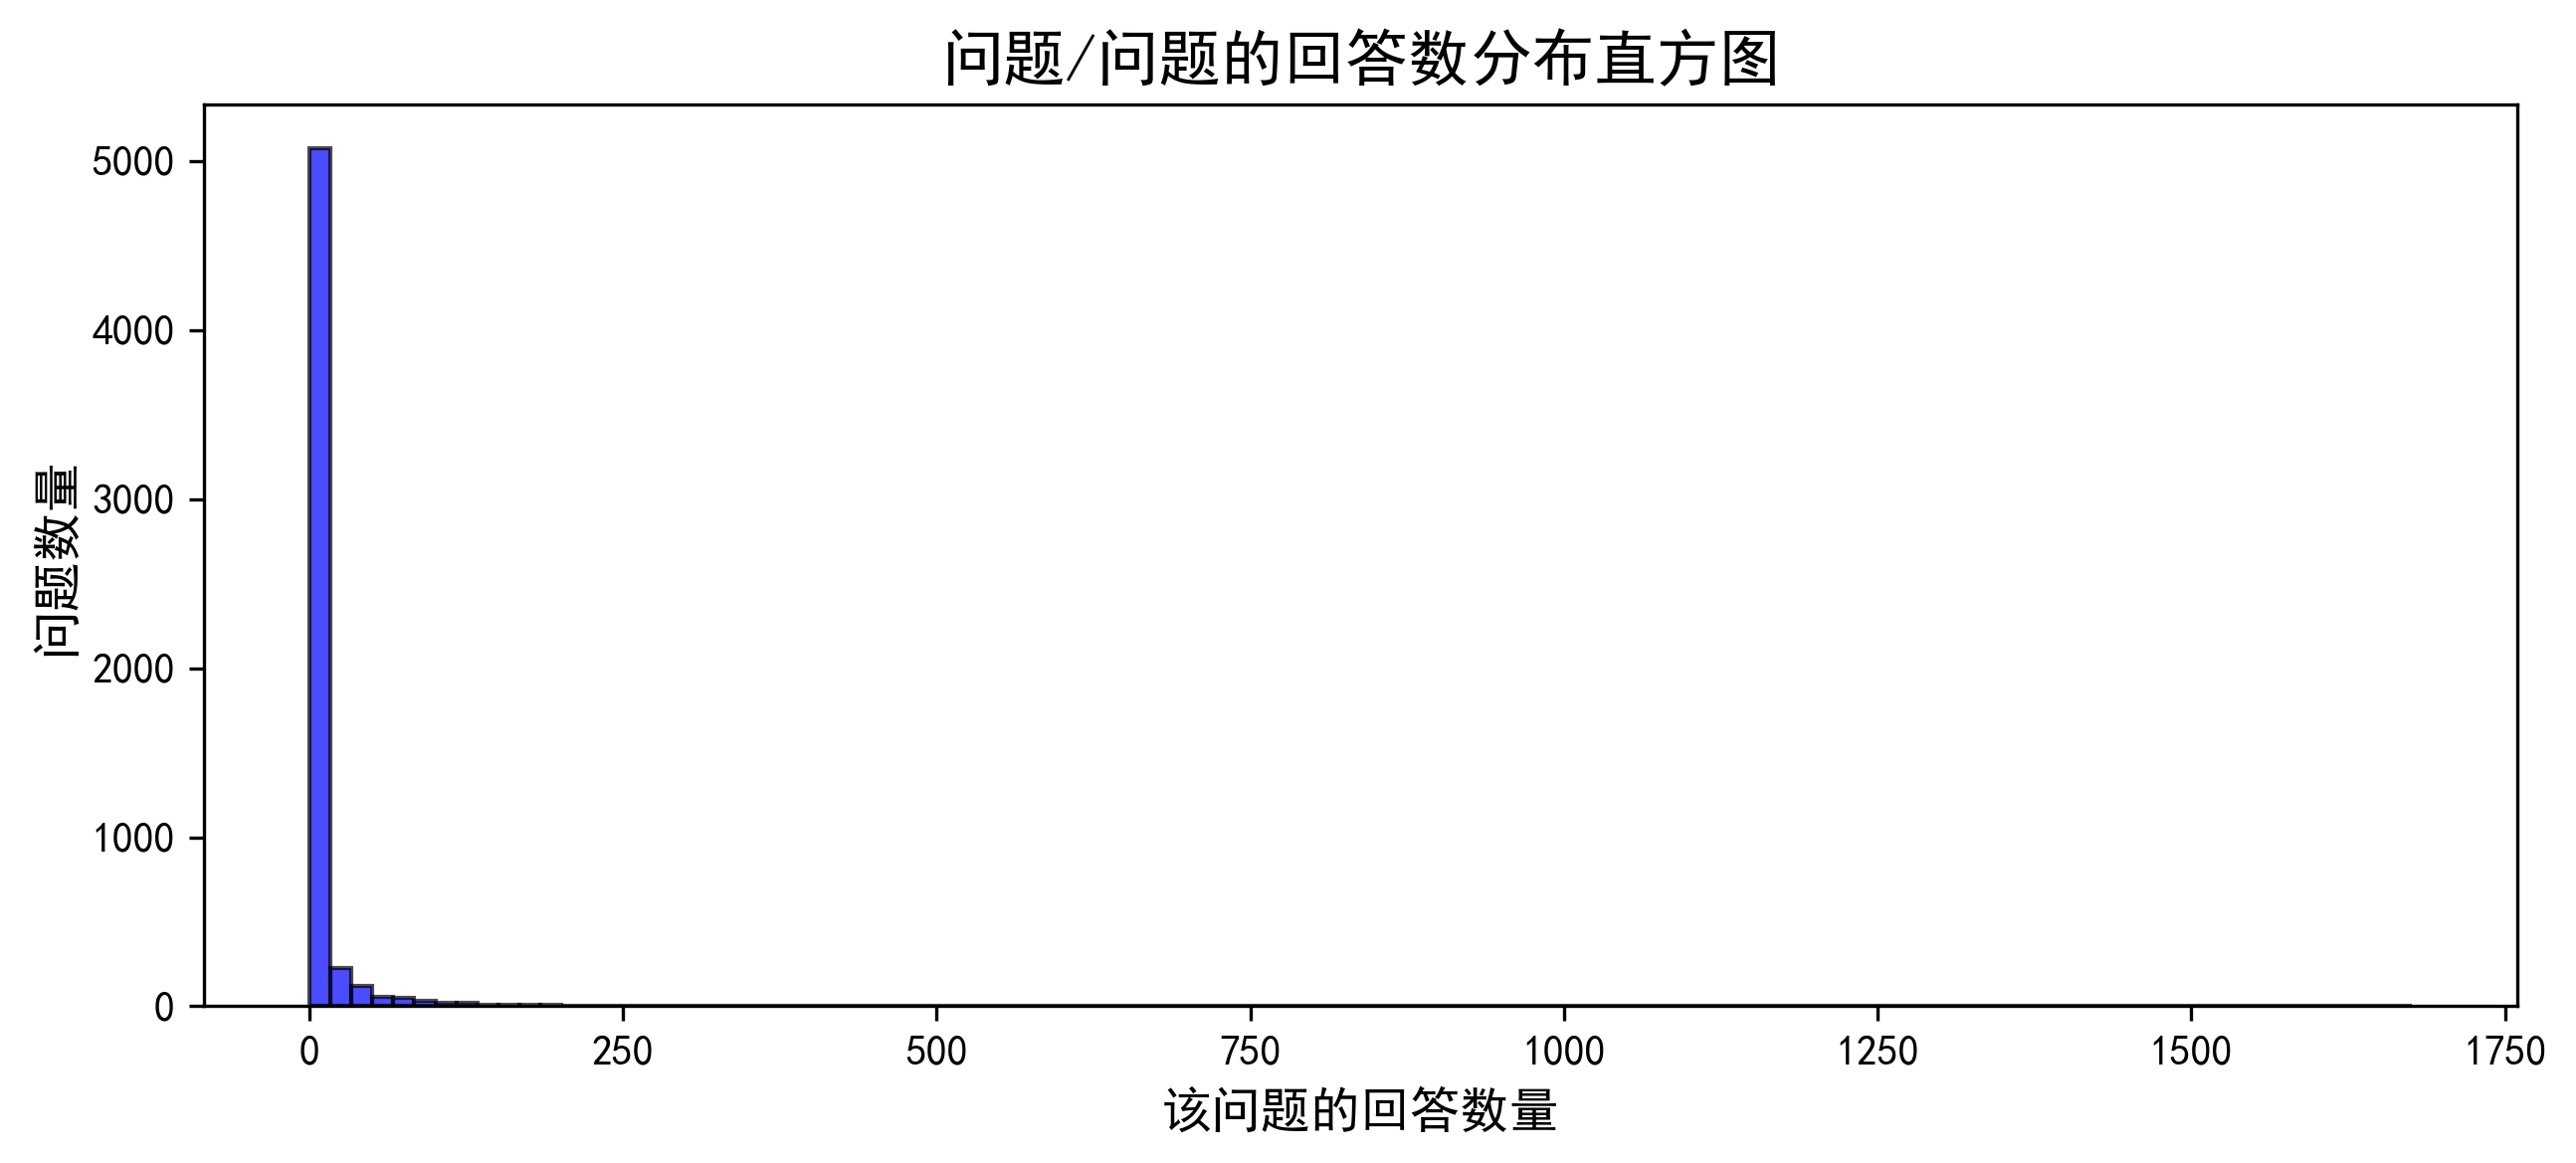

In [39]:
plt.figure(figsize=(10, 4), dpi=300)
plt.hist(data, bins=100, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
plt.xlabel('该问题的回答数量', fontsize = 12)
plt.ylabel('问题数量', fontsize = 12)
plt.title('问题/问题的回答数分布直方图', fontsize = 15)
plt.savefig('Result/question.png')

In [42]:
hundredIndex = data.index(99)
tenIndex = data.index(10)
zeroIndex = data.index(0)
print(hundredIndex, tenIndex, zeroIndex)

105 720 4720


#### 问题分析

In [64]:
total = sum([answerSta[i] for i in answerSta])
print(total)

56631


In [65]:
label = list(answerSta.keys())
data = [answerSta[i] for i in answerSta]
size = [d / total for d in data]

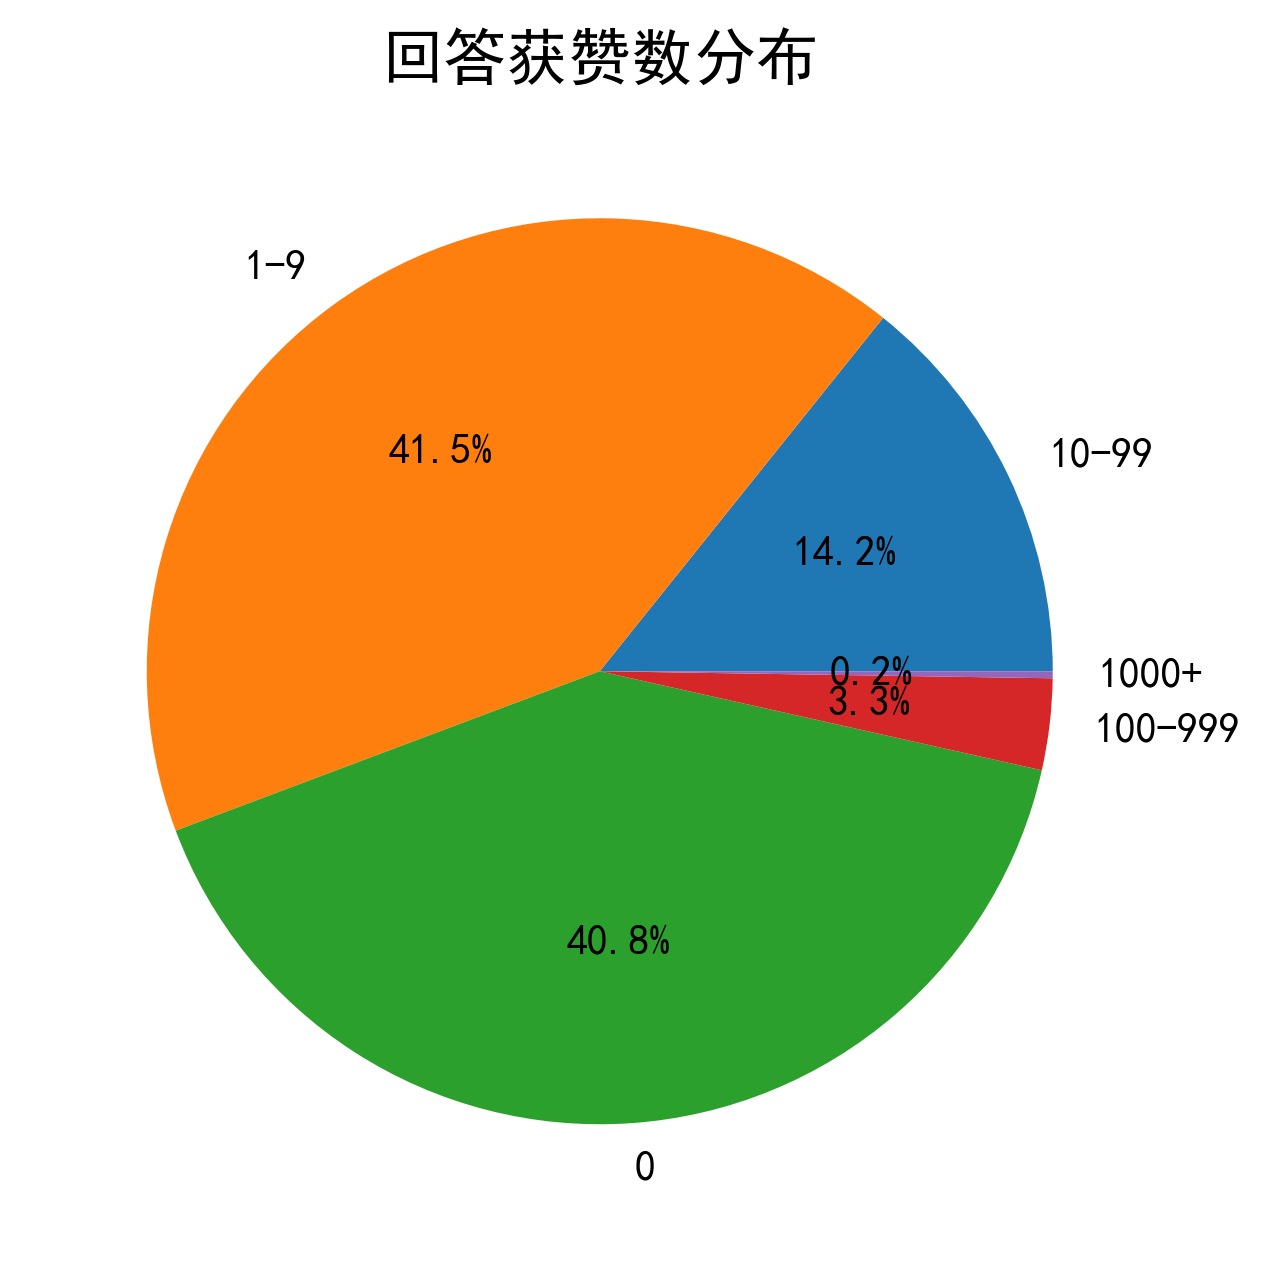

In [67]:
plt.figure(figsize=(5, 5), dpi=300)
plt.pie(size, labels = label, autopct='%1.1f%%')
plt.title('回答获赞数分布', fontsize = 15)
plt.savefig('Result/answer.png')

In [55]:
topAnswerSta = sorted(topAnswerSta.items(), key=lambda x:x[1], reverse=True)

#### 文章分析

In [59]:
total = sum([articleSta[i] for i in articleSta])
print(total)

494


In [60]:
label = list(articleSta.keys())
data = [articleSta[i] for i in articleSta]
size = [d / total for d in data]

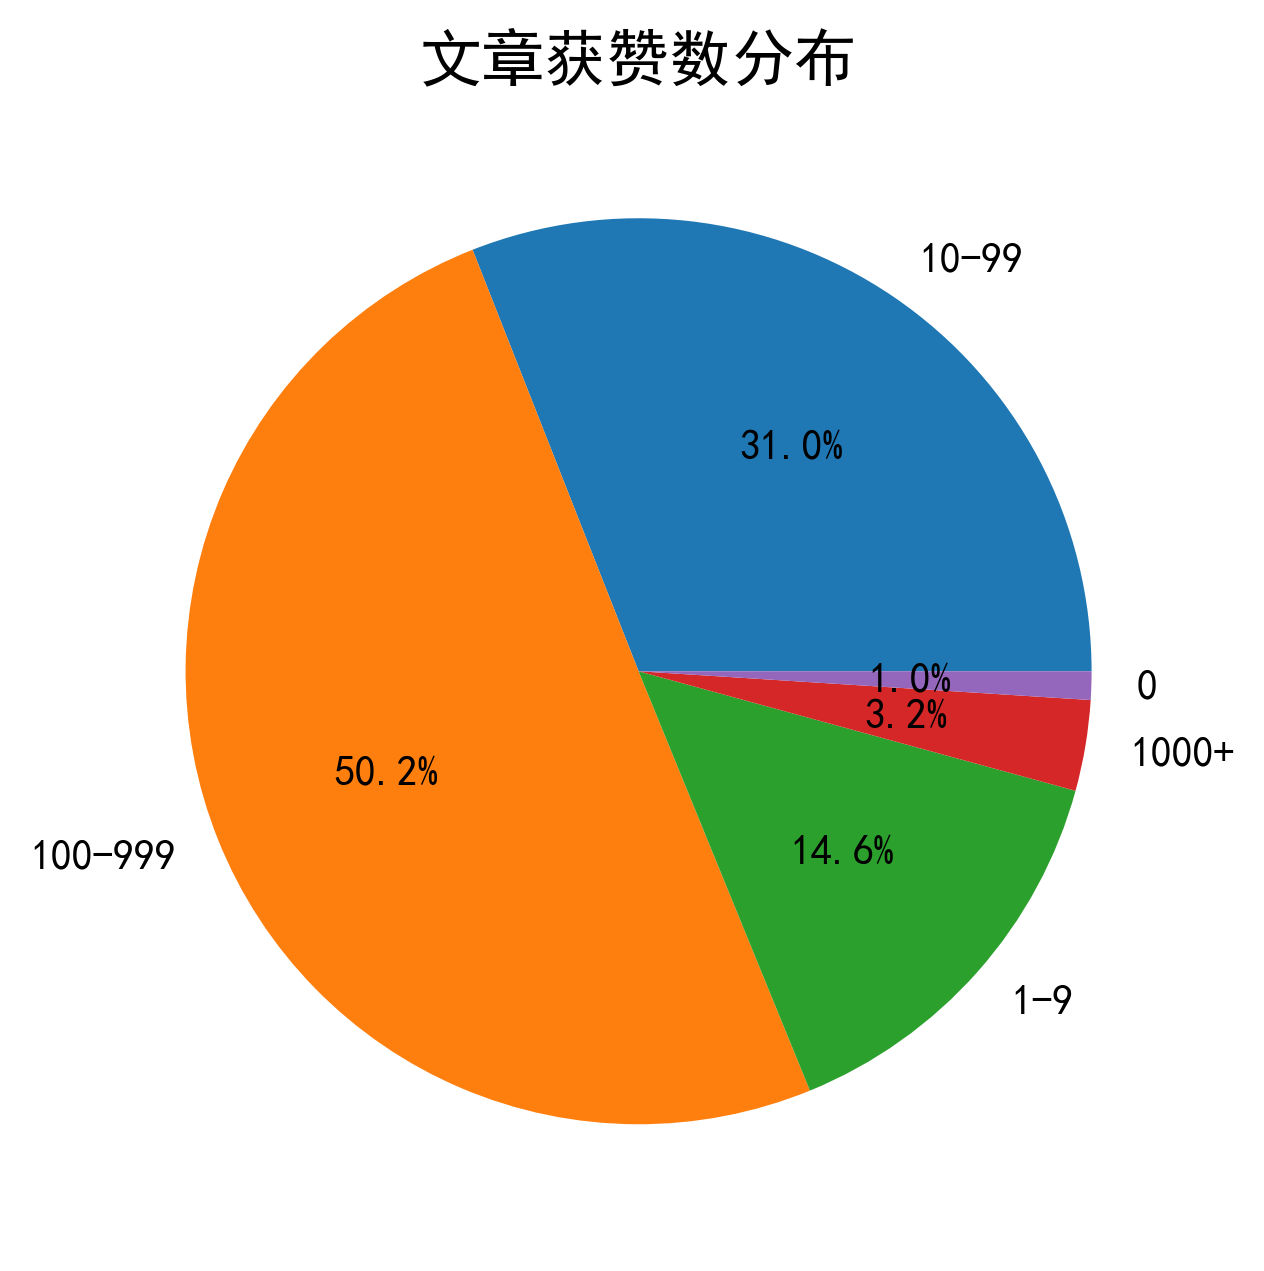

In [61]:
plt.figure(figsize=(5, 5), dpi=300)
plt.pie(size, labels = label, autopct='%1.1f%%')
plt.title('文章获赞数分布', fontsize = 15)
plt.savefig('Result/article.png')

#### 答主分析

In [113]:
for key in peopleSta:
    if 'answerCount' not in peopleSta[key]:
        peopleSta[key]['answerUpVote'] = 0

In [114]:
res = sorted(peopleSta.items(), key = lambda x:x[1]['answerUpVote'], reverse=True)

In [101]:
answerCount, articleCount = [], []
for key in peopleSta:
    if 'answerCount' in peopleSta[key]:
        answerCount.append(peopleSta[key]['answerCount'])
    if 'articleCount' in peopleSta[key]:
        articleCount.append(peopleSta[key]['articleCount'])

In [102]:
answerCount = sorted(answerCount, reverse=True)
articleCount = sorted(articleCount, reverse=True)

In [105]:
tenIndex = answerCount.index(10)
oneIndex = answerCount.index(1)
print(tenIndex, oneIndex)
print(len(answerCount))

400 6245
29428


In [107]:
tenIndex = articleCount.index(10)
oneIndex = articleCount.index(1)
print(tenIndex, oneIndex)
print(len(articleCount))

6 79
171
